In [3]:
import pandas as pd
df_cars=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto ML\src\USA_cars_datasets.csv")

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score


# Seleccionar características para el clustering
numeric_features = ['price', 'year', 'mileage']
categorical_features = ['brand', 'model', 'title_status', 'color', 'state']

# Crear un preprocesador para las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Función para encontrar el número óptimo de clusters
def find_optimal_clusters(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('kmeans', kmeans)
        ])
        cluster_labels = pipeline.fit_predict(data)
        score = silhouette_score(pipeline['preprocessor'].transform(data), cluster_labels)
        silhouette_scores.append(score)
    return silhouette_scores.index(max(silhouette_scores)) + 2

# Encontrar el número óptimo de clusters
max_k = 10
optimal_k = find_optimal_clusters(df_cars[numeric_features + categorical_features], max_k)

# Crear y ajustar el modelo final
final_kmeans = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=optimal_k, random_state=42))
])

df_cars['cluster'] = final_kmeans.fit_predict(df_cars[numeric_features + categorical_features])

# Imprimir resultados
print(f"Número óptimo de clusters: {optimal_k}")
print("\nDistribución de clusters:")
print(df_cars['cluster'].value_counts().sort_index())

# Analizar características de los clusters
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = df_cars[df_cars['cluster'] == cluster]
    for feature in numeric_features:
        print(f"{feature}: Media = {cluster_data[feature].mean():.2f}, Mediana = {cluster_data[feature].median():.2f}")
    for feature in categorical_features:
        print(f"{feature}: Moda = {cluster_data[feature].mode().values[0]}")


Número óptimo de clusters: 2

Distribución de clusters:
cluster
0    2008
1     491
Name: count, dtype: int64

Cluster 0:
price: Media = 21751.47, Mediana = 19800.00
year: Media = 2017.90, Mediana = 2018.00
mileage: Media = 33459.38, Mediana = 30922.50
brand: Moda = ford
model: Moda = door
title_status: Moda = clean vehicle
color: Moda = white
state: Moda = pennsylvania

Cluster 1:
price: Media = 6565.10, Mediana = 5100.00
year: Media = 2011.86, Mediana = 2013.00
mileage: Media = 129344.17, Mediana = 110748.00
brand: Moda = ford
model: Moda = door
title_status: Moda = clean vehicle
color: Moda = white
state: Moda = texas


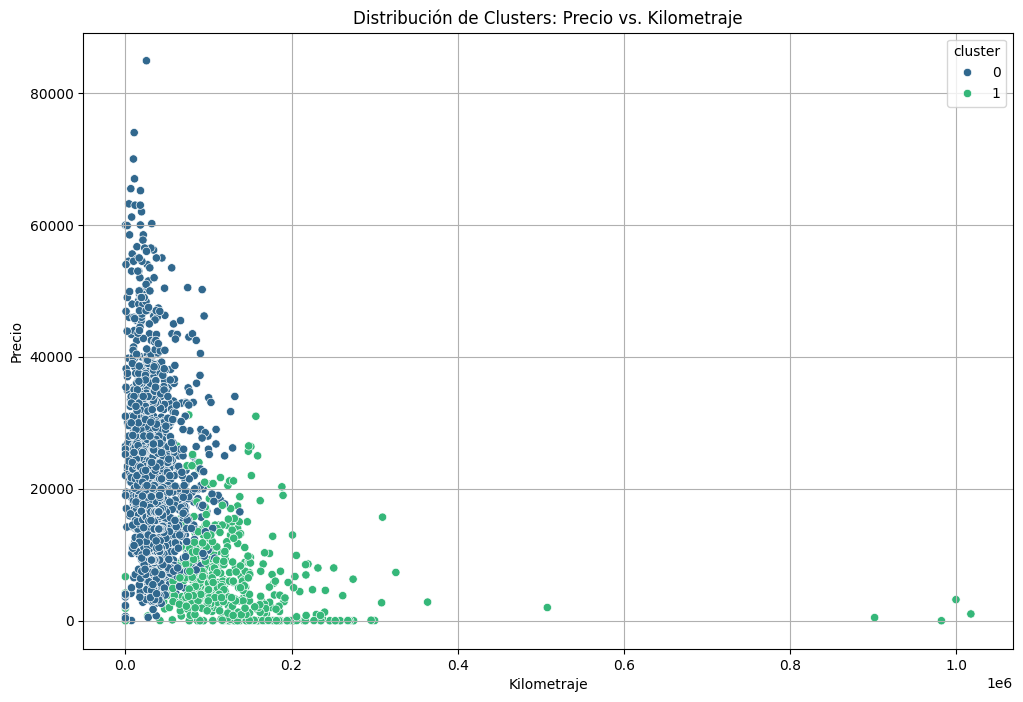

'\n# Gráfico de barras \nplt.figure(figsize=(10, 6))\ndf_cars.groupby(\'cluster\')[\'year\'].mean().plot(kind=\'bar\')\nplt.title(\'Año Promedio por Cluster\')\nplt.xlabel(\'Cluster\')\nplt.ylabel(\'Año Promedio\')\nplt.show()\n\n# Analizar los centroides\ncentroids = scaler.inverse_transform(kmeans.cluster_centers_)\nfor i, centroid in enumerate(centroids):\n    print(f"Centroide del cluster {i}:")\n    print(f"  Precio: ${centroid[0]:.2f}")\n    print(f"  Año: {centroid[1]:.0f}")\n    print(f"  Kilometraje: {centroid[2]:.0f}")\n'

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



#Gráfico de dispersión de precio vs. kilometraje, coloreado por cluster
plt.figure(figsize=(12, 8))
#scater=plt.scatter(df_cars['mileage'],df_cars['price'], c=df_cars['cluster'], cmap='viridis')
sns.scatterplot(data=df_cars, x='mileage', y='price', hue='cluster', palette='viridis')
plt.title('Distribución de Clusters: Precio vs. Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.grid()
plt.show()

'''
# Gráfico de barras 
plt.figure(figsize=(10, 6))
df_cars.groupby('cluster')['year'].mean().plot(kind='bar')
plt.title('Año Promedio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Año Promedio')
plt.show()

# Analizar los centroides
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    print(f"Centroide del cluster {i}:")
    print(f"  Precio: ${centroid[0]:.2f}")
    print(f"  Año: {centroid[1]:.0f}")
    print(f"  Kilometraje: {centroid[2]:.0f}")
'''

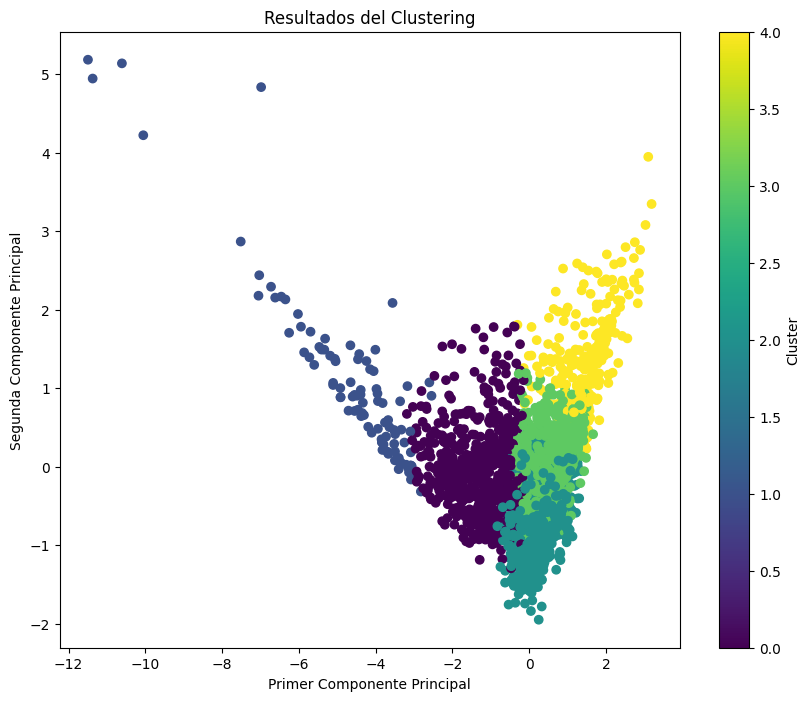

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_transformed[:, 0], features_transformed[:, 1], c=df_cars['cluster'], cmap='viridis')
plt.title('Resultados del Clustering')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.colorbar(scatter, label='Cluster')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------

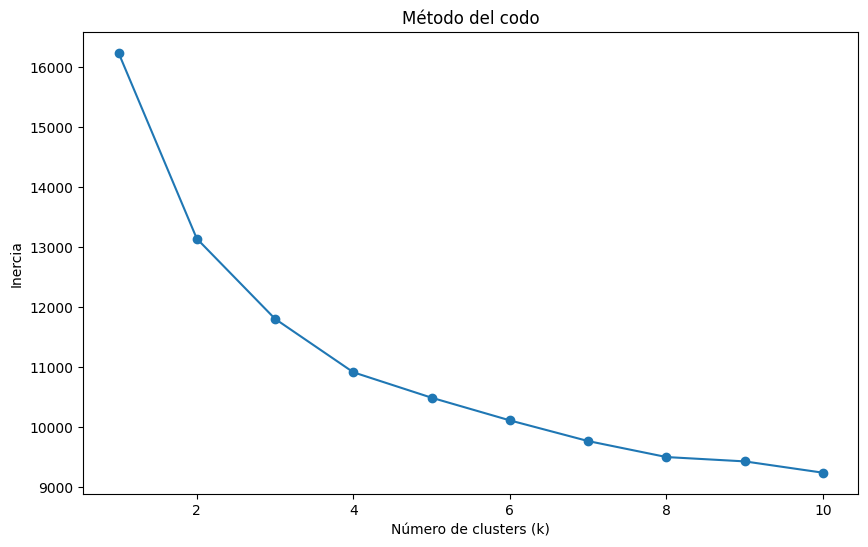

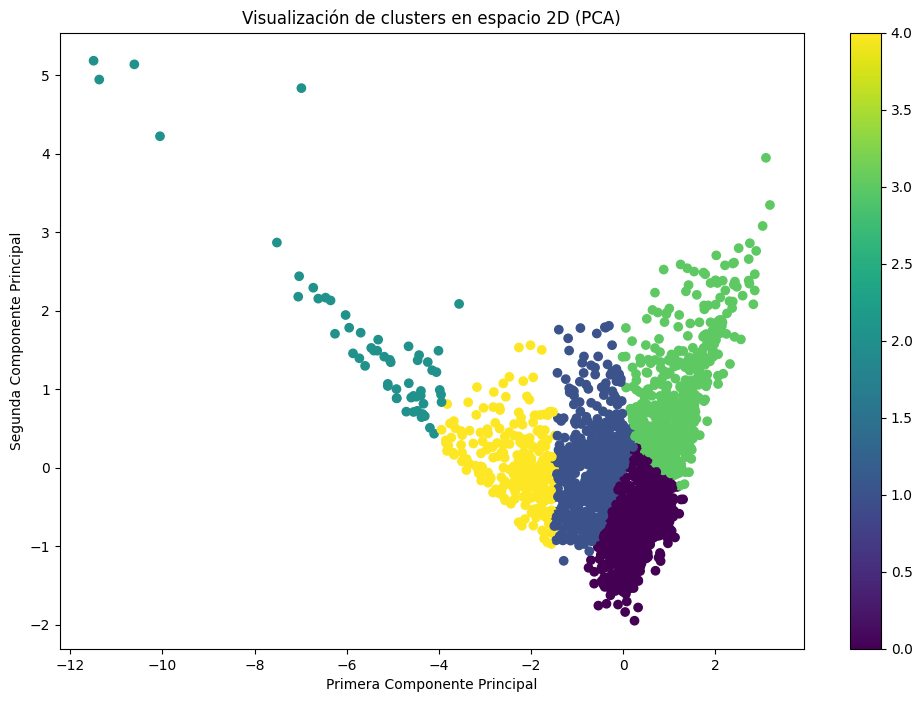

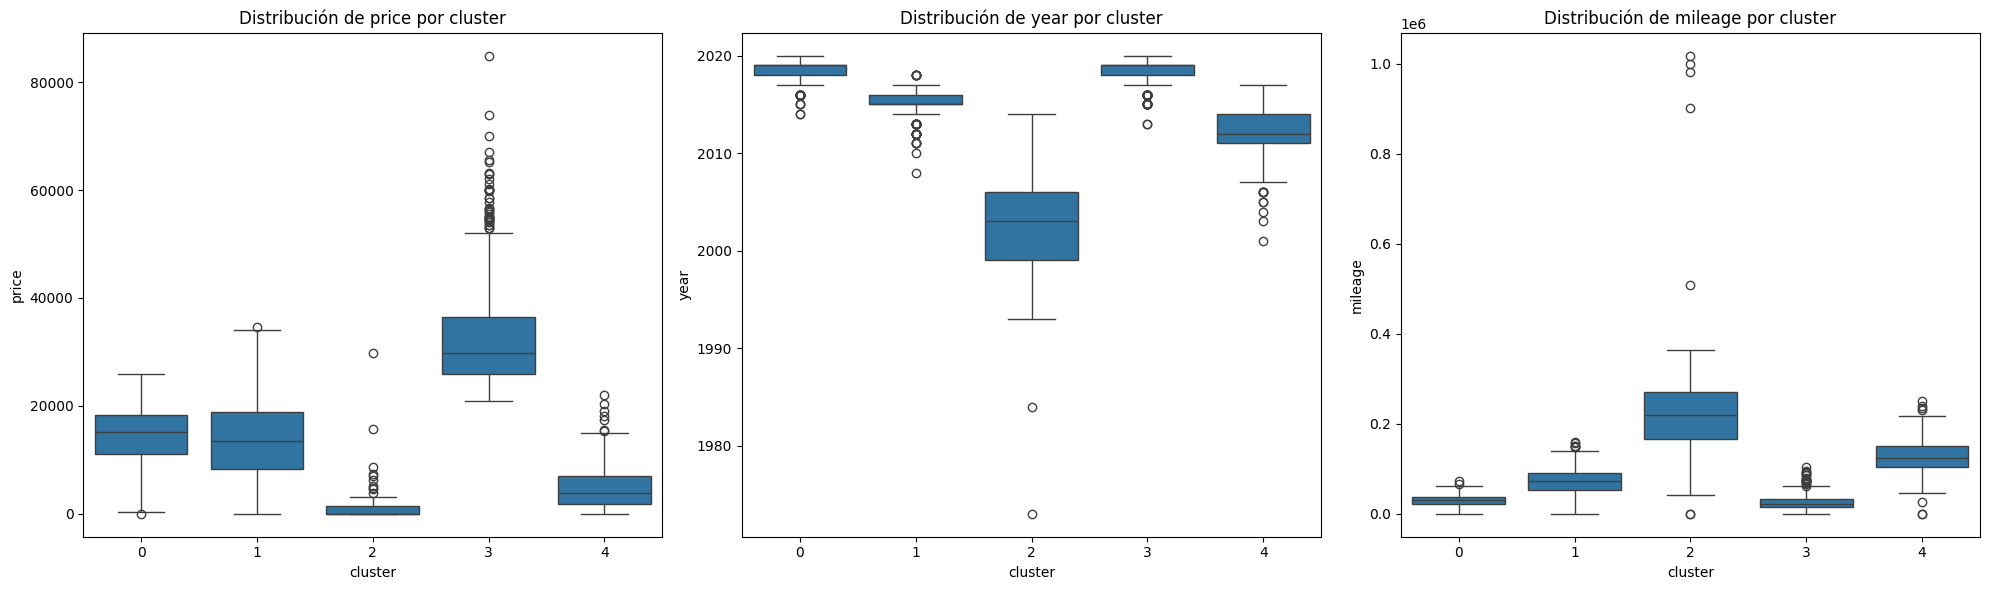

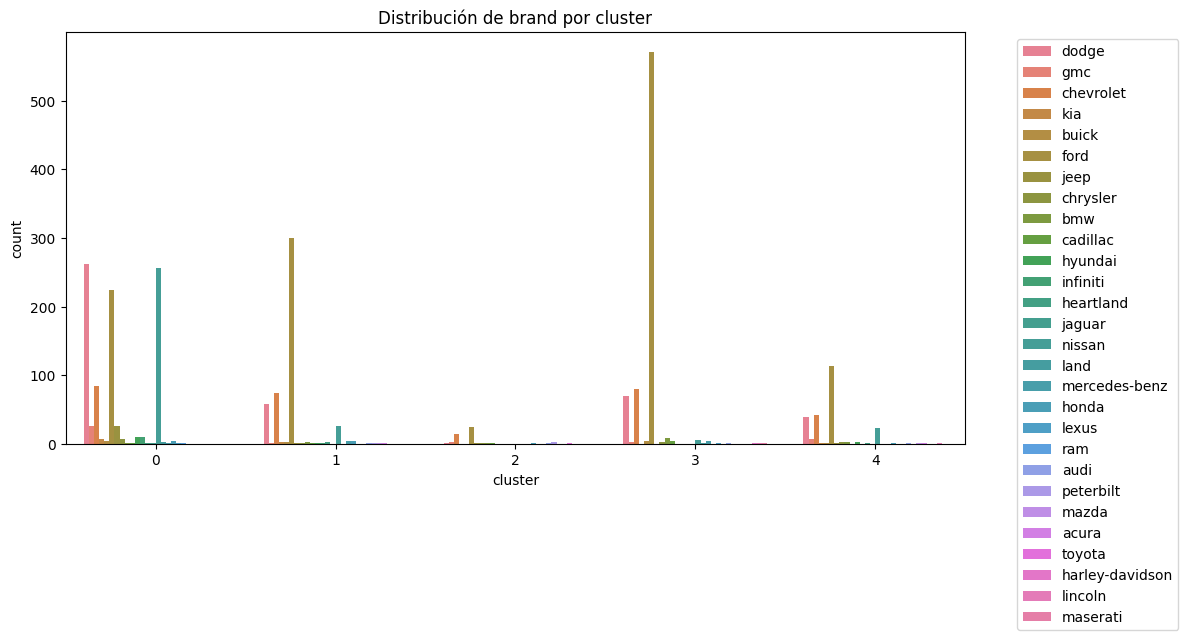

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17028\2561546740.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


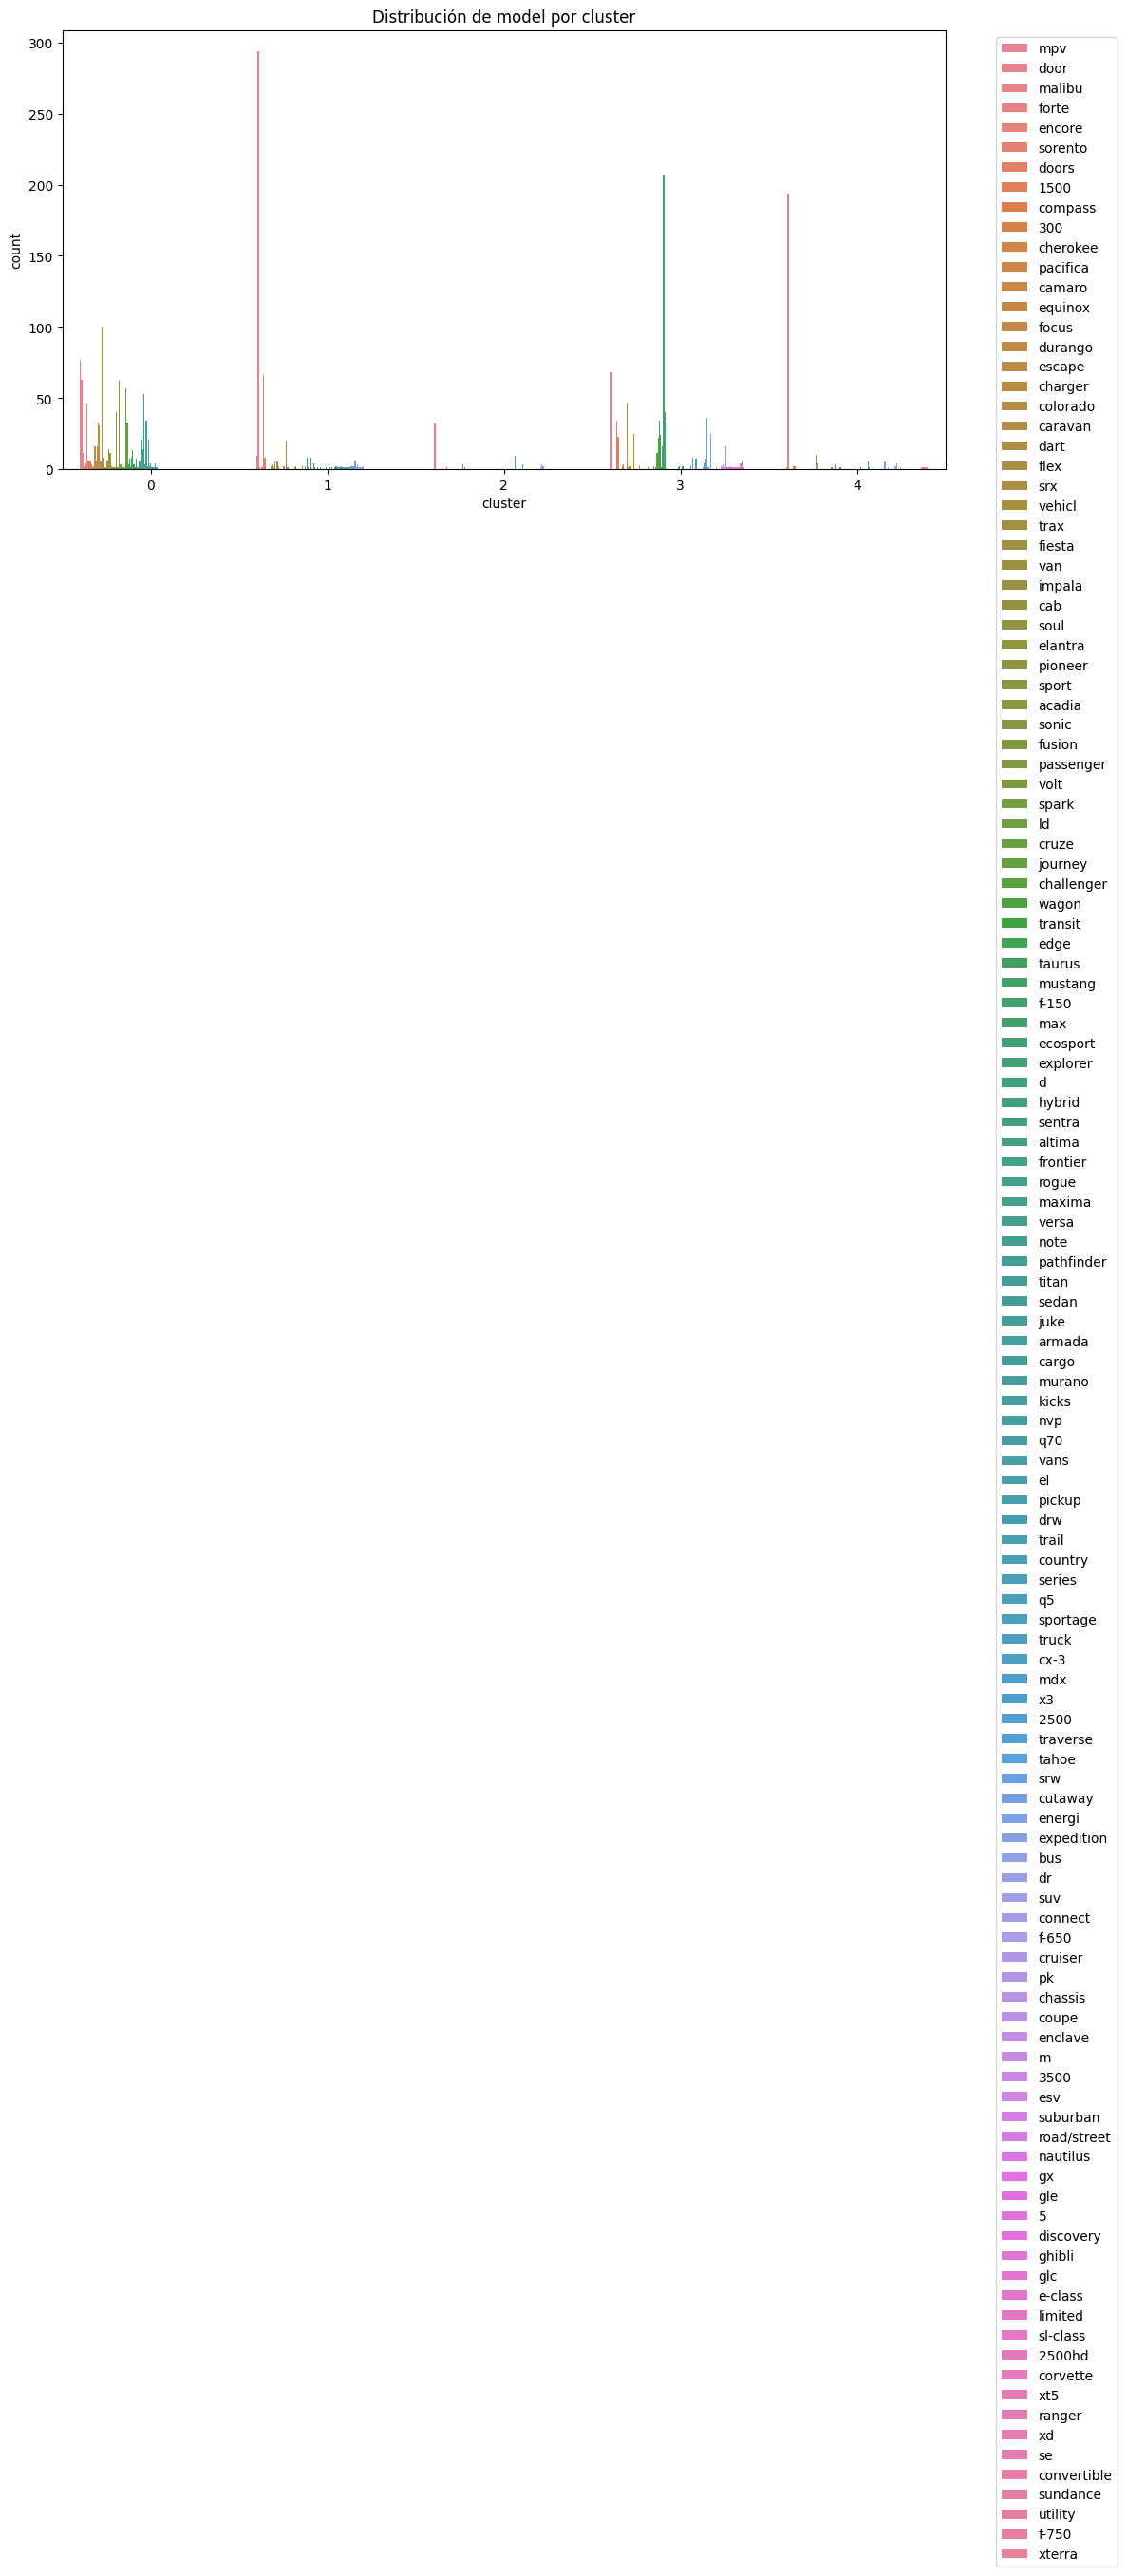

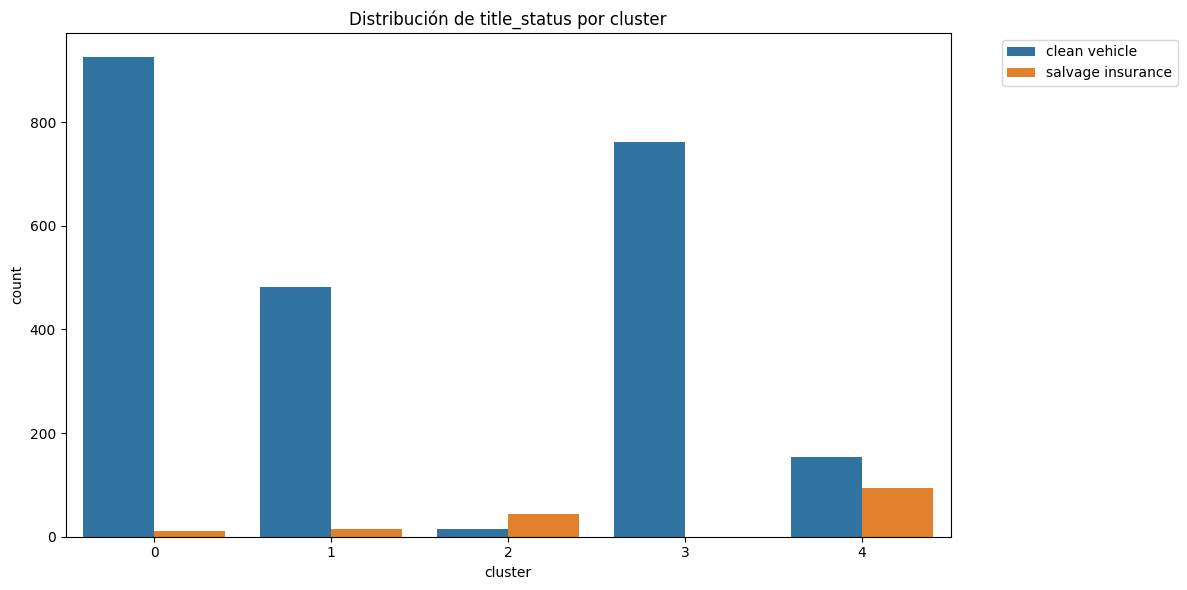

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17028\2561546740.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


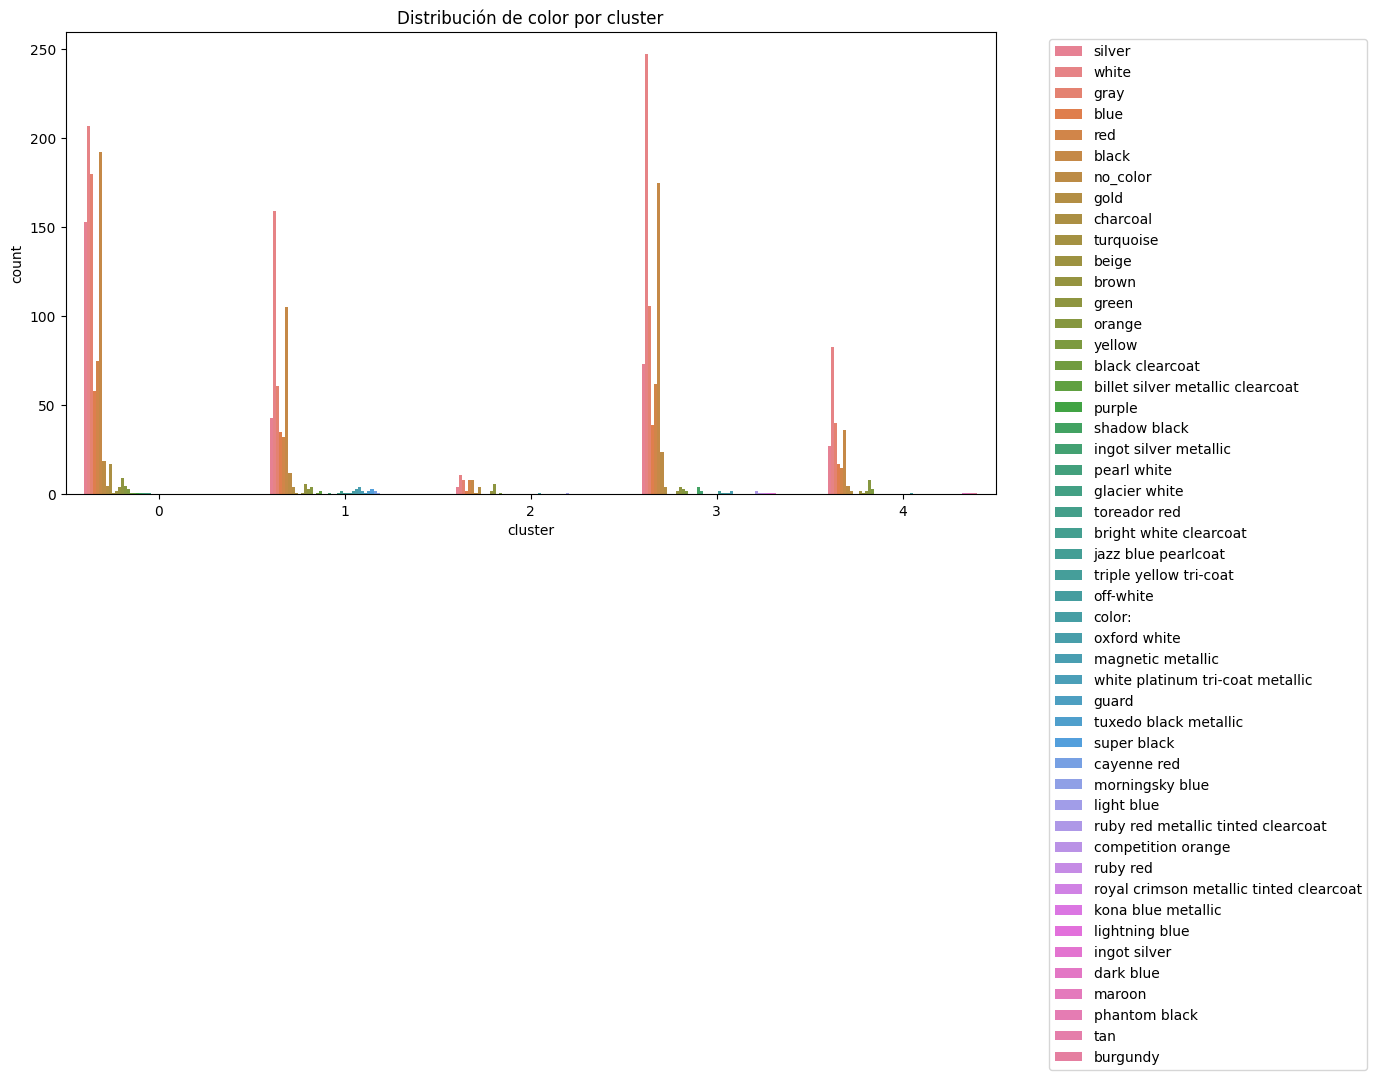

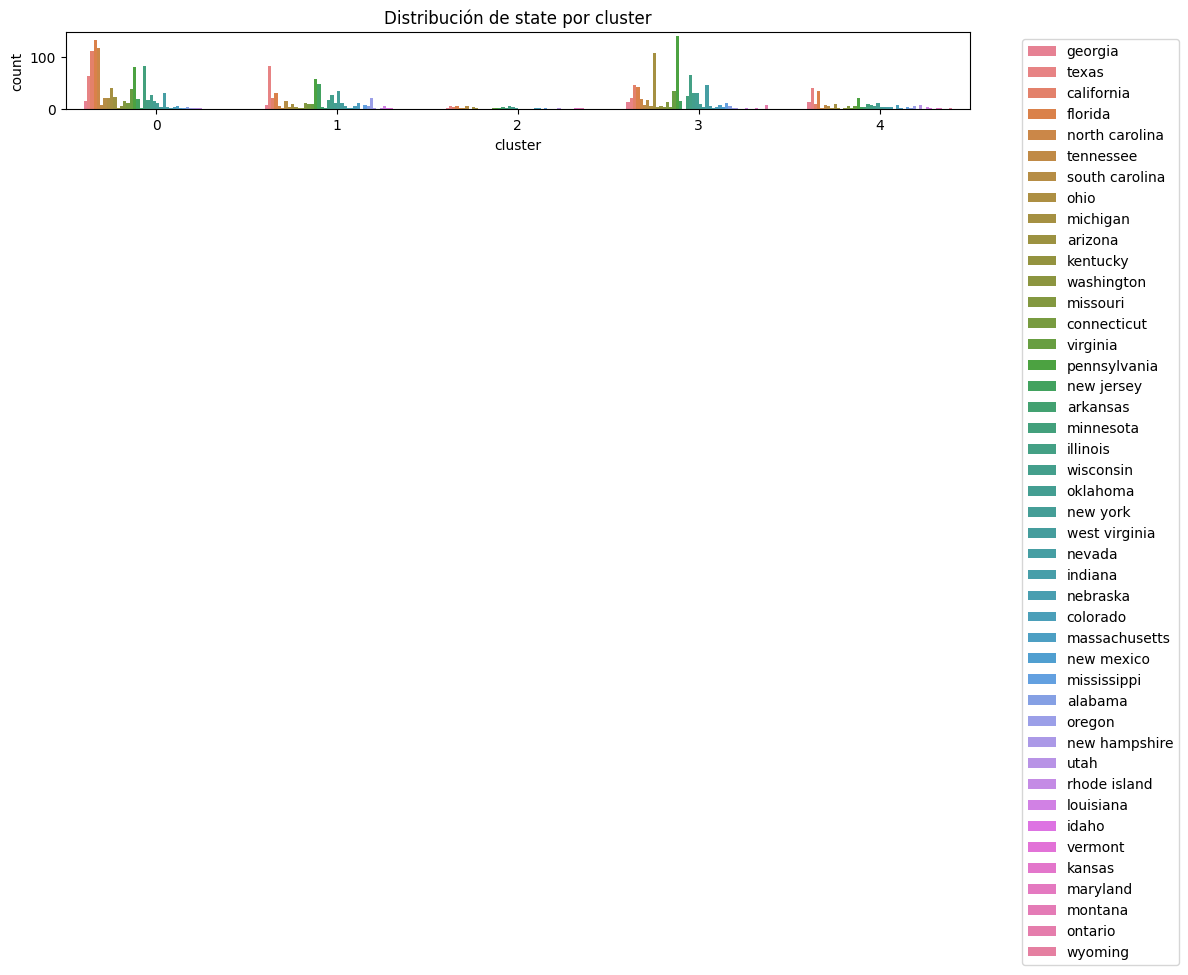

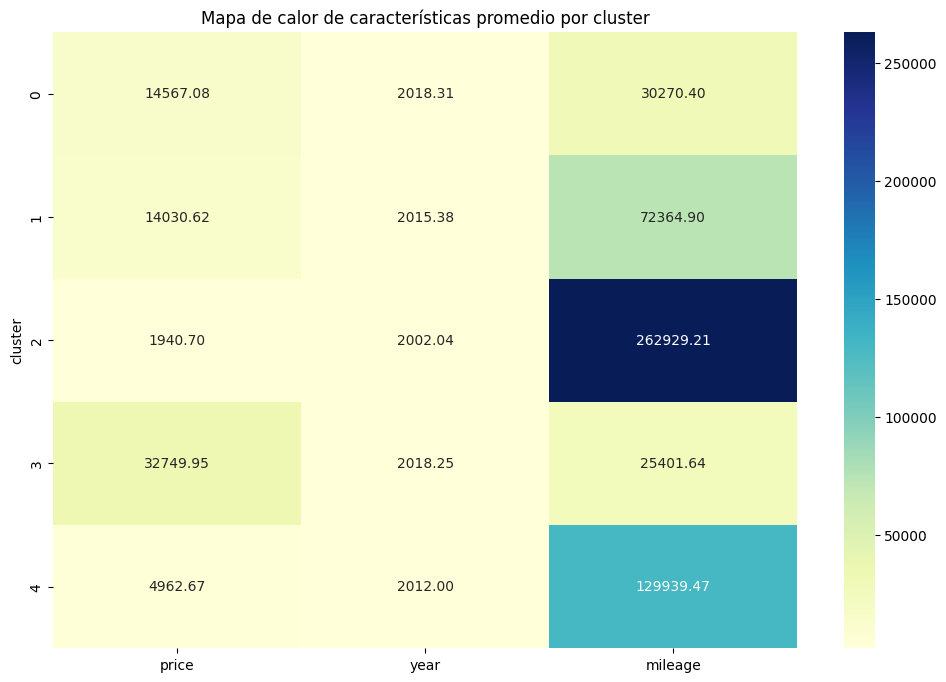

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
#plt.style.use('seaborn')
#sns.set_palette("deep")

# Gráfico de codo para determinar el número óptimo de clusters
def plot_elbow_curve(data, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('kmeans', kmeans)
        ])
        pipeline.fit(data)
        inertias.append(pipeline['kmeans'].inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del codo')
    plt.show()

plot_elbow_curve(df_cars[numeric_features + categorical_features], max_k)

# Visualización de clusters en espacio 2D (usando PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(final_kmeans['preprocessor'].transform(df_cars[numeric_features + categorical_features]))

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cars['cluster'], cmap='viridis')
plt.title('Visualización de clusters en espacio 2D (PCA)')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.colorbar(scatter)
plt.show()

# Distribución de características numéricas por cluster
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='cluster', y=feature, data=df_cars, ax=axes[i])
    axes[i].set_title(f'Distribución de {feature} por cluster')
plt.tight_layout()
plt.show()

# Distribución de características categóricas por cluster
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='cluster', hue=feature, data=df_cars)
    plt.title(f'Distribución de {feature} por cluster')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Mapa de calor de las características promedio por cluster
cluster_means = df_cars.groupby('cluster')[numeric_features].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Mapa de calor de características promedio por cluster')
plt.show()
